In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.spatial import ConvexHull

In [14]:
path = '../comparison'
path_e = os.path.join(path, 'episodic')

case =  'rnd'
path_e = os.path.join(path_e, case, 'results.csv')

df_e = pd.read_csv(path_e)

In [4]:
df_e

,Unnamed: 0,episodes,total_steps,final_states,x0s,y0s,th0s,xgs,ygs,xfs,yfs,thfs
0,0,0,42,2,-3.770441,4.394596,0.543916,0.580414,1.496258,1.368468,3.320298,-1.206084
1,1,1,125,2,-2.077110,1.195213,-3.035915,-0.064912,-2.324596,0.726540,-0.650137,-2.002730
2,2,2,2,2,0.393375,3.260827,1.022603,2.212454,4.424819,0.549719,3.516868,1.022603
3,3,3,602,3,0.667811,-3.343190,0.300129,2.050568,-0.993524,-3.473003,3.234859,-1.567129
4,4,4,602,3,-3.468625,-3.789703,2.837610,0.742261,-4.368508,-4.126341,-4.176665,2.452649
...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,995,602,3,3.472506,3.083308,2.246922,-3.891925,1.965215,2.408964,4.288179,1.861961
996,996,996,423,2,0.289619,-4.437706,1.840377,-1.672981,2.923319,-3.285290,3.901934,-0.560067
997,997,997,294,2,1.999105,2.941305,0.713813,-1.648320,-2.753698,0.223260,-3.365386,3.096555
998,998,998,1,2,1.280468,1.601336,1.512673,2.579725,2.284059,1.280468,1.601336,1.262673


random
87.2 % crashed times
12.8 % success times
0.0 % nothing times
baseline
0.0 % crashed times
10.8 % success times
89.2 % nothing times
rnd
0.4 % crashed times
50.6 % success times
49.0 % nothing times


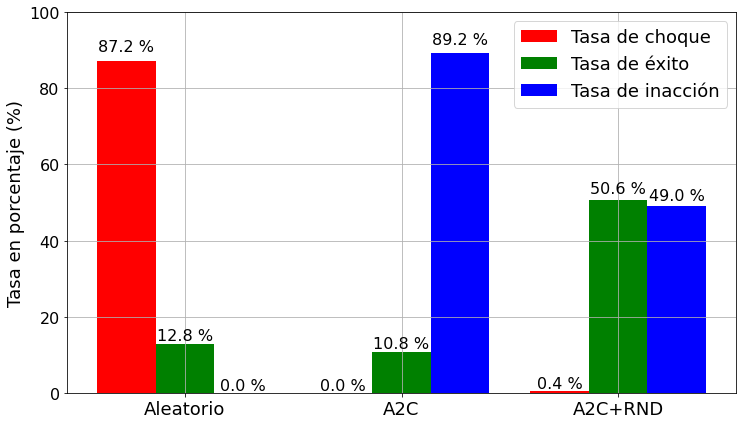

In [15]:
def counter(data):
    zxs = []
    ra = [1,2,3]
    for a in ra:
        z = np.count_nonzero(df_e['final_states'].values == a)/10
        zxs.append(z)
    return ra, zxs
        

cases = ['random', 'baseline', 'rnd']

ls_lst = []

for case in cases:
    path = '../comparison'
    path_e = os.path.join(path, 'episodic')

    #case =  'rnd'
    path_e = os.path.join(path_e, case, 'results.csv')

    df_e = pd.read_csv(path_e)
    
    
    
    zs, zxs = counter(df_e['final_states'].values)
    #zs, zxs = np.unique(df_e['final_states'].values,return_counts=True)
    
    labels = ['','crashed', 'success', 'nothing']
    print(case)
    for z, zx in zip(zs, zxs):
        print('{} % {} times'.format(zx, labels[z])  )
        
    ls_lst.append(zxs)
    
ls_lst = np.array(ls_lst)

N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure(figsize = (12,7))
ax = fig.add_subplot(111)
plt.grid(True)

rects1 = ax.bar(ind, ls_lst[:,0], width, color='r')
rects2 = ax.bar(ind+width, ls_lst[:,1], width, color='g')
rects3 = ax.bar(ind+width*2, ls_lst[:,2], width, color='b')

ax.set_ylabel('Tasa en porcentaje (%)', fontsize = 18 )
ax.tick_params(axis='y', labelsize=16)
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Aleatorio', 'A2C', 'A2C+RND'), fontsize = 18 )
ax.legend( (rects1[0], rects2[0], rects3[0]), ('Tasa de choque', 'Tasa de éxito', 'Tasa de inacción'), fontsize = 18 )



def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.02*h, '{} %'.format(h),
                ha='center', va='bottom', fontsize = 16)

plt.ylim([0, 100])
        
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

#plt.xticks([1, 2, 3],cases)

        


random
87.2 % crashed times
12.8 % success times
0.0 % nothing times
baseline
0.0 % crashed times
10.8 % success times
89.2 % nothing times
rnd
0.4 % crashed times
50.6 % success times
49.0 % nothing times
[[87.2 12.8  0. ]
 [ 0.  10.8 89.2]
 [ 0.4 50.6 49. ]]


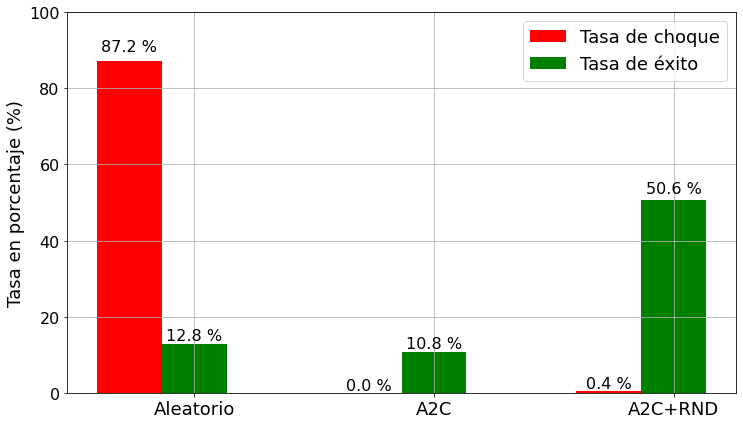

In [12]:
def counter(data):
    zxs = []
    ra = [1,2,3]
    for a in ra:
        z = np.count_nonzero(df_e['final_states'].values == a)/10
        zxs.append(z)
    return ra, zxs
        

cases = ['random', 'baseline', 'rnd']

ls_lst = []

for case in cases:
    path = '../comparison'
    path_e = os.path.join(path, 'episodic')

    #case =  'rnd'
    path_e = os.path.join(path_e, case, 'results.csv')

    df_e = pd.read_csv(path_e)
    
    
    
    zs, zxs = counter(df_e['final_states'].values)
    #zs, zxs = np.unique(df_e['final_states'].values,return_counts=True)
    
    labels = ['','crashed', 'success', 'nothing']
    print(case)
    for z, zx in zip(zs, zxs):
        print('{} % {} times'.format(zx, labels[z])  )
        
    ls_lst.append(zxs)
    
ls_lst = np.array(ls_lst)
print(ls_lst)

N = 3
ind = np.arange(N)  # the x locations for the groups
width = 0.27       # the width of the bars

fig = plt.figure(figsize = (12,7))
ax = fig.add_subplot(111)
plt.grid(True)

rects1 = ax.bar(ind, ls_lst[:,0], width, color='r')
rects2 = ax.bar(ind+width, ls_lst[:,1], width, color='g')
#rects3 = ax.bar(ind+width*2, ls_lst[:,2], width, color='b')

ax.set_ylabel('Tasa en porcentaje (%)', fontsize = 18 )
ax.tick_params(axis='y', labelsize=16)
ax.set_xticks(ind+width)
ax.set_xticklabels( ('Aleatorio', 'A2C', 'A2C+RND'), fontsize = 18 )
ax.legend( (rects1[0], rects2[0]), ('Tasa de choque', 'Tasa de éxito'), fontsize = 18 )



def autolabel(rects):
    for rect in rects:
        h = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.02*h, '{} %'.format(h),
                ha='center', va='bottom', fontsize = 16)

plt.ylim([0, 100])
        
autolabel(rects1)
autolabel(rects2)
#autolabel(rects3)

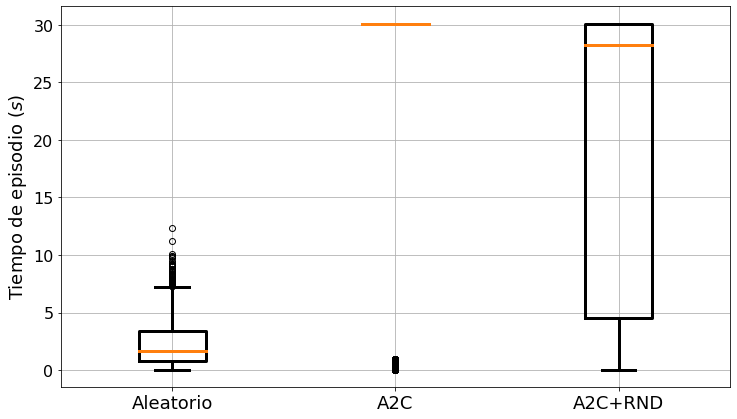

In [27]:
cases = ['random', 'baseline', 'rnd']

ls_lst = []

for case in cases:
    path = '../comparison'
    path_e = os.path.join(path, 'episodic')

    #case =  'rnd'
    path_e = os.path.join(path_e, case, 'results.csv')

    df_e = pd.read_csv(path_e)
    
    t_lst = []
    for index, row in df_e.iterrows():
        a = row['final_states']
        b = row['x0s']
        c = row['y0s']
        d = row['xgs']
        e = row['ygs']
        f = row['total_steps']
        #if a == 2:
        t_lst.append([np.linalg.norm((b - d, c - e)), f])
        
            
    ds = np.array(t_lst)
    #plt.figure()
    #plt.scatter(ds[:,0], ds[:,1])
    ls_lst.append(ds[:,1]*0.05)
    
f, ax = plt.subplots(figsize = (12,7))

plt.grid(True)
plt.boxplot(ls_lst, whiskerprops = dict( linewidth=3), 
                    boxprops = dict(linewidth=3),
                    medianprops = dict(linewidth=3),
                   capprops = dict(linewidth=3))


plt.xticks([1, 2, 3],['Aleatorio', 'A2C', 'A2C+RND'], fontsize = 18)

ax.set_ylabel('Tiempo de episodio ($s$)', fontsize = 18 )
ax.tick_params(axis='y', labelsize=16)

In [24]:
ls_lst[2].shape

(506,)

Case random. Area mean 0.8955351639415268, Area std 1.6548290639812222, and Area max 11.788067079778962
Case baseline. Area mean 0.0, Area std 0.0, and Area max 0
Case rnd. Area mean 14.479601266336111, Area std 13.679403412903325, and Area max 62.5902240669739


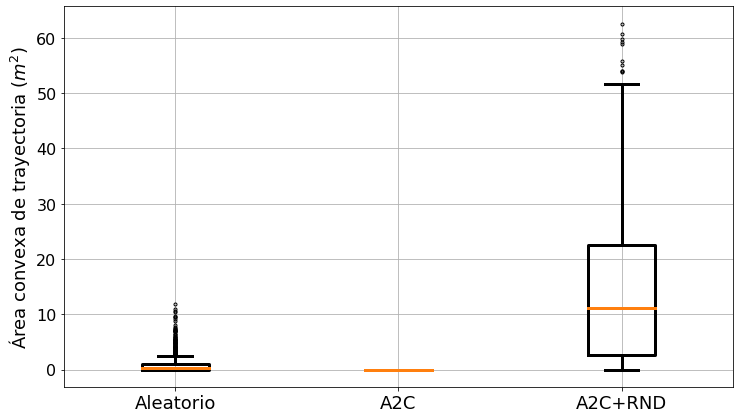

In [51]:

f, ax = plt.subplots(1,1,figsize = (12,7))


ls_lst = []
for i, case in enumerate(cases):
    area_lst = []
    for exp in range(1000):
        path = '../comparison'
        path_v = os.path.join(path, 'vertices')

        #case =  'baseline'
        path_v = os.path.join(path_v, case, str(exp),'vertices.csv')

        df_v = pd.read_csv(path_v)
        if df_v.index.stop > 4:
            #print(df_v.values[:,1:])
            hull = ConvexHull(df_v.values[:,1:])
            area_lst.append(hull.volume)
        else:
            area_lst.append(0)
    ls_lst.append(area_lst)
    #ax[i].boxplot(area_lst)
    m, std, mxm = np.mean(area_lst), np.std(area_lst), np.max(area_lst)
    print('Case {}. Area mean {}, Area std {}, and Area max {}'.format(case, m, std, mxm))
    
black_square = dict( marker='.')       
ax.boxplot(ls_lst, flierprops=black_square,
                  whiskerprops = dict( linewidth=3), 
                    boxprops = dict(linewidth=3),
                    medianprops = dict(linewidth=3),
                   capprops = dict(linewidth=3))
plt.xticks([1, 2, 3],['Aleatorio', 'A2C', 'A2C+RND'], fontsize = 18)

ax.set_ylabel('Área convexa de trayectoria ($m^2$)', fontsize = 18)
ax.tick_params(axis='y', labelsize=16)
plt.grid(True)

In [17]:
a = ConvexHull([(-5,-5),(-5,5),(5,-5),(5,5)]).area
print(a)

40.0


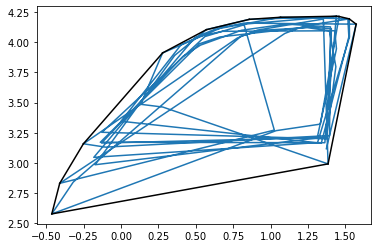

In [15]:
case = 'rnd'

area_lst = []
exp = 318
path = '../comparison'
path_v = os.path.join(path, 'vertices')

#case =  'baseline'
path_v = os.path.join(path_v, case, str(exp),'vertices.csv')

df_v = pd.read_csv(path_v)

points = df_v.values[:,1:]

hull = ConvexHull(points)

plt.plot(points[:,0], points[:,1])

for simplex in hull.simplices:

    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

#print(hull.area)


In [62]:
df_e.sort_values(by=['total_steps'])

,Unnamed: 0,episodes,total_steps,final_states,x0s,y0s,th0s,xgs,ygs,xfs,yfs,thfs
590,590,590,1,2,-4.519833,-0.381476,1.580946,-4.555738,0.120593,-4.519833,-0.381476,1.330946
525,525,525,1,2,-2.343648,-2.572782,0.952157,-2.608852,-1.750690,-2.343648,-2.572782,1.202157
940,940,940,1,2,3.836735,2.399748,-1.761478,3.539248,1.458050,3.808305,2.252466,-1.761478
53,53,53,1,2,-2.186618,-3.452358,0.418120,-0.856469,-2.607518,-2.049540,-3.391451,0.418120
567,567,567,1,2,-3.720387,-1.935150,2.238197,-4.167532,-0.960494,-3.720387,-1.935150,2.488197
...,...,...,...,...,...,...,...,...,...,...,...,...
317,317,317,602,3,-1.252778,-1.679007,1.237934,2.582404,-3.161174,1.387739,3.343137,0.253416
318,318,318,602,3,0.821591,4.149518,-1.343279,-2.388840,3.843799,1.372406,3.118782,3.021759
642,642,642,602,3,3.923765,2.463170,2.712043,-3.221144,-3.294771,1.142127,3.882629,-0.805660
742,742,742,602,3,-2.052543,0.368027,0.070783,1.786595,-1.354222,-3.108523,-2.387395,0.269895


In [ ]:
cases = ['random', 'baseline', 'rnd']

for case in cases:
    path = '../comparison'
    path_e = os.path.join(path, 'episodic')

    #case =  'rnd'
    path_e = os.path.join(path_e, case, 'results.csv')

    df_e = pd.read_csv(path_e)
    
    zs, zxs = np.unique(df_e['final_states'].values,return_counts=True)
    
    labels = ['','crashed', 'success', 'nothing']
    print(case)
    for z, zx in zip(zs, zxs):
        print('{} {} times'.format(zx/10, labels[z])  )
        

In [22]:
path = '../comparison'
path_v = os.path.join(path, 'vertices')

case =  'random'
exp = 3
path_v = os.path.join(path_v, case, str(exp),'vertices.csv')

df_v = pd.read_csv(path_v)

In [14]:
df_v

,Unnamed: 0,x,y
0,0,3.928509,0.704096
1,1,4.078434,0.699364
2,2,4.222528,0.657687
3,3,4.515399,0.722702


In [16]:
hull = ConvexHull(df_v.values[:,1:])

In [28]:
hull.area

6.974013796297237

16

In [17]:
df_v.values[:,1:]

array([[3.92850889, 0.70409638],
       [4.07843423, 0.69936435],
       [4.22252803, 0.6576873 ],
       [4.51539853, 0.7227017 ]])

In [18]:
area_lst = []

for exp in range(1000):
    path = '../comparison'
    path_v = os.path.join(path, 'vertices')


    case =  'baseline'
    path_v = os.path.join(path_v, case, str(exp),'vertices.csv')

    df_v = pd.read_csv(path_v)
    if df_v.index.stop > 4:
        #print(df_v.values[:,1:])
        hull = ConvexHull(df_v.values[:,1:])
        area_lst.append(hull.area)
    else:
        area_lst.append(0)

    

In [20]:
np.mean(area_lst)

0.023022617459998385

-----------------------
